In [41]:
import numpy as np
import cv2

# Punto 1

In [42]:
densidad = 150000 #unidades/mm2
area_cono = 1/densidad

#si asumimos que los conos son "cuadrados", el lado del cono es L=sqrt(area_cono)
#fuente: a checkear --> Distancia focal a 30cm = 15,8mm


image_size = np.sqrt(area_cono)/15.8 * 300
print(f"tamaño mínimo: {image_size:.04f} mm")

# Sabiendo que la densidad de pixeles de un Motorola Edge 30 es aprox 405 pixeles por pulgada:
densidad_lineal_moderno = 405/25.4 #esto nos da la densidad "lineal" de pixeles por mm
pixel_size = 1/densidad_lineal_moderno
print(f"Tamaño de pixel moderno: {pixel_size:.04f} mm")

tamaño mínimo: 0.0490 mm
Tamaño de pixel moderno: 0.0627 mm


Tiene sentido que el pixel sea más grande que el tamaño mínimo, para poder distinguir las imágenes en el celular.

# Punto 2
## Consideraciones
- Como el detector es cuadrado, consideramos que la representación de la imagen también
    - Esto lleva a que 1MP = 1000P * 1000P, así se tiene un "lado" de imagen de 1000 pixeles.

In [43]:
altura_detector = 10 # CCD de 10x10mm
cant_pixeles = 1e6 #1MP
lado_en_pixeles = 1000
distancia = 1000 #1m en mm

distancia_real = 10/35 * 1000 #Todo en milímetros, sale de semejanza de triángulos
distancia_por_pixel = distancia_real / lado_en_pixeles

print(f"La distancia que representa el ancho de un pixel es {distancia_por_pixel:.04f}mm")

La distancia que representa el ancho de un pixel es 0.2857mm


# Punto 3

# Punto 4

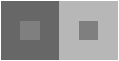

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Crear dos bloques de 9x9
imagen = np.zeros((9, 18))

# Fondo del bloque izquierdo
imagen[:, :9] = 103

# Fondo del bloque derecho
imagen[:, 9:] = 183

# Cuadrado central gris
imagen[3:6, 3:6] = 127     # Cuadrado en el bloque oscuro
imagen[3:6, 12:15] = 127   # Cuadrado en el bloque claro

# Mostrar imagen ampliada sin bordes
plt.figure(figsize=(9, 4.5), dpi=13)
plt.imshow(imagen, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()

#con izq=63, der=223
    #para mí, se ven iguales con 145 en el lado derecho
#con izq=33, der=243
    #se ven iguales con 135 del lado derecho.
#con izq=83, der=203
    #se ven iguales con 150 del lado derecho.

#conclusiones
    # Mientras más cercanos entre sí los colores de fondo, más diferencia debe haber entre los
    # colores de los centros para percibirlas iguales

    # Siguiendo una misma línea, mientras más distantes los colores de fondo, menor es la diferencia
    # entre colores de centro

    #Esto puede explicarse con el comportamiento "pasa bajos" del ojo humano, que intenta "promediar"
    #las intensidades. Por lo tanto, mientras más contraste, más "fácil" es para el ojo distinguir los colores
    #y menos diferencia de color en el centro se requiere.

    #Mientras menos contraste haya, más "le cuesta" al ojo distinguir el color.



    #Interpreto que esta diferencia de colores es un producto del contraste que tienen los cuadraditos, ya que
    # al tener una gran diferencia de colores entre el borde y el centro se ve una zona fronteriza donde se ve 
    # una combinación de colores que parece crear una ilusión de profundidad, al ser imagenes chicas predomina más 
    # la zona fronteriza que el centro, por lo que se ve una diferencia de colores entre cada cuadradito



# Punto 5

In [45]:
import cv2
import numpy as np

img = cv2.imread('mono.bmp', cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
h, w = img.shape
decim_a = img[2::4, 2::4]  # Elegís el pixel (2,2) de cada bloque 4x4

decim_b = img[1::4, 1::4]

decim_c = np.zeros((h // 4, w // 4), dtype=np.uint8)
for i in range(0, h, 4):
    for j in range(0, w, 4):
        block = img[i:i+4, j:j+4]
        decim_c[i//4, j//4] = np.mean(block).astype(np.uint8)

def bilinear_interpolation(im, scale):
    h, w = im.shape
    new_h, new_w = h * scale, w * scale
    result = np.zeros((new_h, new_w), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            x = i / scale
            y = j / scale

            x0 = int(x)
            x1 = min(x0 + 1, h - 1)
            y0 = int(y)
            y1 = min(y0 + 1, w - 1)

            dx = x - x0
            dy = y - y0

            result[i, j] = (
                im[x0, y0] * (1 - dx) * (1 - dy) +
                im[x1, y0] * dx * (1 - dy) +
                im[x0, y1] * (1 - dx) * dy +
                im[x1, y1] * dx * dy
            ).astype(np.uint8)

    return result

interp_a = bilinear_interpolation(decim_a, 4)
interp_b = bilinear_interpolation(decim_b, 4)
interp_c = bilinear_interpolation(decim_c, 4)



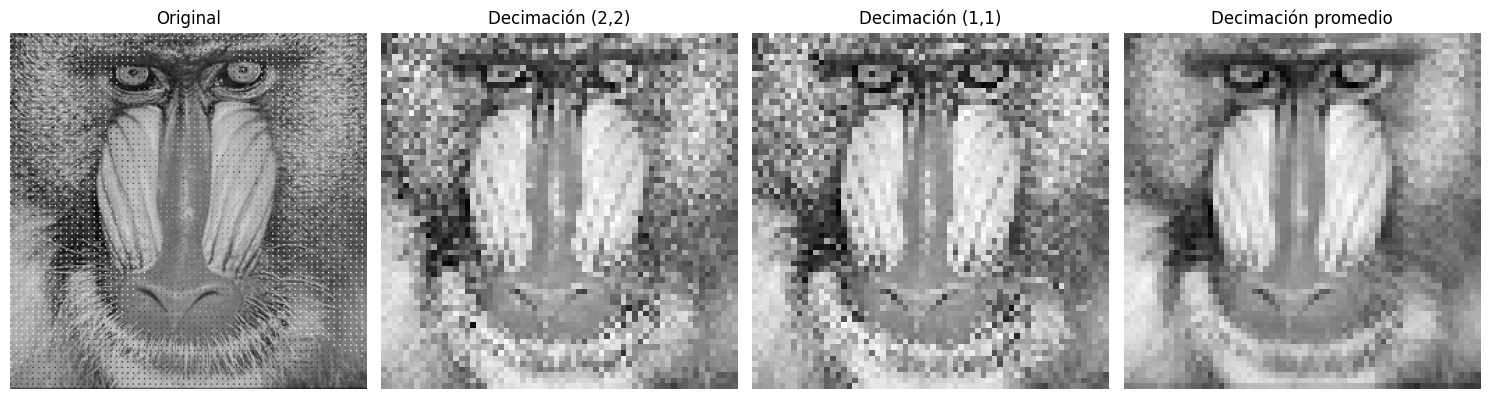

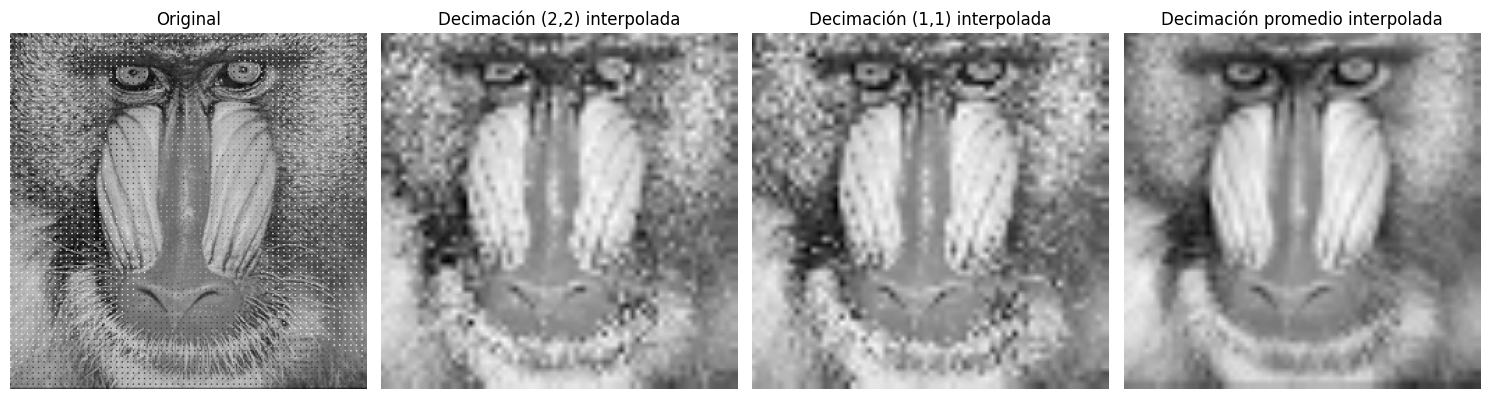

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(decim_a, cmap='gray')
plt.title('Decimación (2,2)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(decim_b, cmap='gray')
plt.title('Decimación (1,1)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(decim_c, cmap='gray')
plt.title('Decimación promedio')
plt.axis('off')

plt.tight_layout()
plt.show()

#Interpolaciones bilineales
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(interp_a, cmap='gray')
plt.title('Decimación (2,2) interpolada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(interp_b, cmap='gray')
plt.title('Decimación (1,1) interpolada')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(interp_c, cmap='gray')
plt.title('Decimación promedio interpolada')
plt.axis('off')

plt.tight_layout()
plt.show()

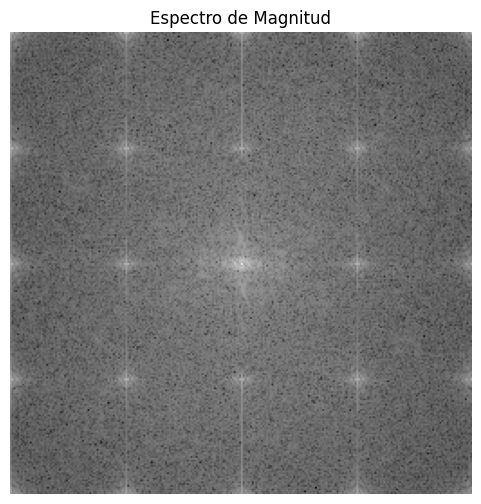

In [47]:
import matplotlib.pyplot as plt

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud')
plt.axis('off')
plt.show()
